#  Customer Churn Prediction

In [11]:
import pandas as pd

In [12]:
df=pd.read_excel('customer_churn_large_dataset.xlsx')

In [13]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,99996.0,Customer_99996,33.0,Male,Houston,23.0,55.13,226.0,1.0
99996,99997.0,Customer_99997,62.0,Female,New York,19.0,61.65,351.0,0.0
99997,99998.0,Customer_99998,64.0,Male,Chicago,17.0,96.11,251.0,1.0
99998,99999.0,Customer_99999,51.0,Female,New York,20.0,49.25,434.0,1.0


In [16]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [17]:
import seaborn as sb

<AxesSubplot:>

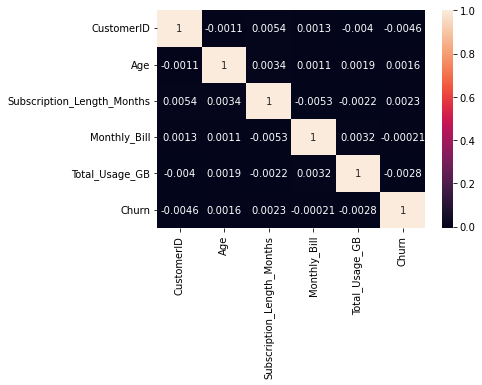

In [18]:
sb.heatmap(df.corr(),annot=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [22]:
categorical_columns=['Gender','Location']

In [23]:
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
x=df.drop(columns=['Name'])

In [32]:
y=df['Churn']

In [33]:
x

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,46.0,0,3,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...
99995,99996.0,33.0,1,1,23.0,55.13,226.0,1.0
99996,99997.0,62.0,0,4,19.0,61.65,351.0,0.0
99997,99998.0,64.0,1,0,17.0,96.11,251.0,1.0
99998,99999.0,51.0,0,4,20.0,49.25,434.0,1.0


In [34]:
y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
99995    1.0
99996    0.0
99997    1.0
99998    1.0
99999    1.0
Name: Churn, Length: 100000, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=10)

In [39]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=10)

In [40]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)

In [41]:
print('Percentage Accuracy:',100*accuracy_score(y_test,y_pred))

Percentage Accuracy: 100.0
